# TF-IDF Model for Topic Modeling
## To answer the question: What did consumers talk about in their review for video games, back in 2018.

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import gzip




In [2]:
df = pd.read_json('Video_Games.json.gz', lines = True, compression = 'gzip')

In [3]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1,True,"06 9, 2014",A21ROB4YDOZA5P,0439381673,Mary M. Clark,I used to play this game years ago and loved i...,Did not like this,1402272000,NaN,NaN,NaN
1,3,True,"05 10, 2014",A3TNZ2Q5E7HTHD,0439381673,Sarabatya,The game itself worked great but the story lin...,Almost Perfect,1399680000,NaN,NaN,NaN
2,4,True,"02 7, 2014",A1OKRM3QFEATQO,0439381673,Amazon Customer,I had to learn the hard way after ordering thi...,DOES NOT WORK WITH MAC OS unless it is 10.3 or...,1391731200,15,NaN,NaN
3,1,True,"02 7, 2014",A2XO1JFCNEYV3T,0439381673,ColoradoPartyof5,The product description should state this clea...,does not work on Mac OSX,1391731200,11,NaN,NaN
4,4,True,"01 16, 2014",A19WLPIRHD15TH,0439381673,Karen Robinson,I would recommend this learning game for anyon...,Roughing it,1389830400,NaN,NaN,NaN


In [31]:
import re
df['year'] = df.reviewTime.apply(lambda t: re.search('(\d+)$',t).group(1))

In [32]:
df['year'] = df["year"].astype(int)

In [35]:
# focus on data after 2017
df = df[df.year >= 2017]

In [36]:
import re
from sklearn import feature_extraction 
stop_words = feature_extraction.text.ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

def preprocess(text):
  text = text.lower() #lowercase
  text = re.sub(r'[^\w\s]', '', text) #remove punctuations
  text = re.sub(r'\d+', '', text) #remove numbers
  text = " ".join(text.split()) #stripWhitespace
  text = text.split()
  text = [x for x in text if x not in stop_words] #remove stopwords
  text = [x for x in text if x not in ["dr", "doctor"]] #remove task specific stopwords
  text = " ".join(text)
  # stemmer_ps = PorterStemmer()  
  # text = [stemmer_ps.stem(word) for word in text.split()] #stemming
  # text = " ".join(text)
  lemmatizer = WordNetLemmatizer()
  text = [lemmatizer.lemmatize(word) for word in text.split()]  #lemmatization
  text = " ".join(text)
  return(text)


In [37]:
# take a look at overall
df.describe()

,overall,unixReviewTime,year
count,409478.000000,4.094780e+05,409478.000000
mean,3.966518,1.504725e+09,2017.308097
std,1.496066,1.518623e+07,0.461707
min,1.000000,1.483229e+09,2017.000000
25%,3.000000,1.490573e+09,2017.000000
50%,5.000000,1.502928e+09,2017.000000
75%,5.000000,1.517530e+09,2018.000000
max,5.000000,1.538438e+09,2018.000000


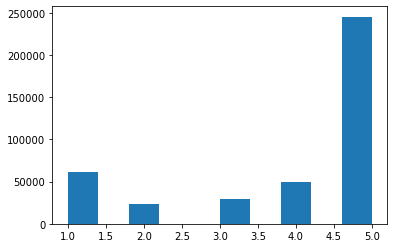

In [38]:
plt.subplot()
plt.hist(df['overall'])
plt.show()

In [42]:
df.sample(5).loc[:,['reviewText','summary']]

,reviewText,summary
2534483,Product as described. 100% perfect.,Legit Purchase
2403817,"Just a heads up, you cannot download this game...","Just a heads up, you cannot download this game..."
1690829,LOVE this keyboard. this is first mechanical k...,best keyboard i've ever owned!
2410412,the items and service is first class thanks,Five Stars
1891817,I loved the first game. I don't care how fanta...,move along. replay stick of truth


In [43]:
df['review_processed']=df['reviewText'].apply(lambda x:preprocess(str(x)))
df['review_processed']=df['review_processed'].apply(lambda x:x.split())

In [44]:
df.head()


# print([x for x in temp[0] if x.lower() not in stop_words])
# # re.sub(r'[%s]' % re.escape(string.punctuation), '', temp[0][-1]) 

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,year,review_processed
10,5,True,"05 28, 2017",ATVYWID968EUQ,0439381673,TaNiesha,I got this to show my kids what I used to play...,Still fun,1495929600,NaN,NaN,NaN,2017,"[got, kid, used, play, school, graphic, signif..."
11,5,True,"03 30, 2017",A3FGRYQWUEM6UP,0439381673,Chey,Works great!,Fun to Play,1490832000,NaN,NaN,NaN,2017,"[work, great]"
12,1,True,"03 17, 2017",AKQPJ6MMWXRP9,0439381673,J. Clarry,I cannot get this game to install on my comput...,Cant play,1489708800,NaN,NaN,NaN,2017,"[game, install, computer, matter]"
13,1,True,"03 1, 2017",AK893YQY5FJIP,0439381673,G. M. Coppolino,My kids were psyched to get this to go along w...,NOT FOR A newer MAC,1488326400,4,NaN,NaN,2017,"[kid, psyched, study, doesnt, work, maceven, d..."
14,5,True,"01 26, 2017",A1PVJA5BYG6XOJ,0439381673,Amazon Customer,You must buy this game!! It is so much fun! Ge...,A must have game!!!,1485388800,NaN,NaN,NaN,2017,"[buy, game, fun, ready, plague, lol]"


In [72]:
from gensim import corpora
dictionary = corpora.Dictionary(df['review_processed'])
dictionaryDF = pd.DataFrame()
dictionaryDF['id']=dictionary.keys()
dictionaryDF['word']=dictionary.values()
# dictionary.filter_extremes(no_below=1)
# no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
# no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
# dictionaryDF = pd.DataFrame()
# dictionaryDF['id']=dictionary.keys()
# dictionaryDF['word']=dictionary.values()
# dictionaryDF
# see https://radimrehurek.com/gensim/corpora/dictionary.html for details

In [75]:
len(dictionary)

69943

In [79]:
dictionary.filter_extremes(no_below = 100, no_above = 1000)
# keep_n (int, optional) – Keep only the first keep_n most frequent tokens.
dictionaryDF = pd.DataFrame()
dictionaryDF['id']=dictionary.keys()
dictionaryDF['word']=dictionary.values()
dictionaryDF

,id,word
0,0,ago
1,1,computer
2,2,did
3,3,game
4,4,loved
...,...,...
20809,20809,gamesir
20810,20810,evie
20811,20811,romerg
20812,20812,trico


In [80]:
# corpus
df['text_ids']=df['review_processed'].apply(lambda x:dictionary.doc2bow(x))

In [91]:
from gensim import models
num_topics=30
ldamodel = models.ldamodel.LdaModel(df['text_ids'], 
                                    num_topics = num_topics, 
                                    id2word=dictionary, 
                                    passes=1, 
                                    random_state=100)
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(14, '0.089*"controller" + 0.056*"mouse" + 0.035*"use" + 0.033*"keyboard" + 0.027*"buttons" + 0.025*"controllers" + 0.020*"button" + 0.017*"gaming"')
(6, '0.282*"new" + 0.107*"characters" + 0.058*"different" + 0.037*"character" + 0.034*"items" + 0.030*"special" + 0.030*"match" + 0.028*"ones"')
(4, '0.055*"black" + 0.046*"broke" + 0.044*"red" + 0.040*"blue" + 0.038*"piece" + 0.036*"white" + 0.031*"stay" + 0.024*"family"')
(24, '0.079*"came" + 0.057*"happy" + 0.045*"fast" + 0.042*"got" + 0.041*"received" + 0.039*"arrived" + 0.037*"time" + 0.031*"ordered"')
(3, '0.093*"hear" + 0.077*"music" + 0.062*"noise" + 0.057*"ears" + 0.057*"ear" + 0.035*"final" + 0.033*"songs" + 0.033*"expectations"')
(28, '0.210*"ds" + 0.107*"wii" + 0.104*"super" + 0.071*"nintendo" + 0.043*"d" + 0.040*"games" + 0.027*"mario" + 0.022*"fit"')
(5, '0.193*"ps" + 0.141*"xbox" + 0.052*"console" + 0.030*"playstation" + 0.026*"grandson" + 0.025*"card" + 0.021*"games" + 0.019*"customer"')
(27, '0.071*"color" + 0.065*"keys" 

In [89]:
# !pip install pyLDAvis
import pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel,df['text_ids'],dictionary,mds="mmds",R=30)

AttributeError: module 'pyLDAvis' has no attribute 'gensim'

In [94]:
len(df["reviewText"][0])

139

# Word2Vec model for scrutinizing the context for specific word

In [40]:
!pip install gensim

     |████████████████████████████████| 24.0 MB 20.3 MB/s eta 0:00:01
  Using cached smart_open-5.2.1-py3-none-any.whl (58 kB)


In [46]:
# data preprocessing / data cleaning
from gensim.models.word2vec import Word2Vec
import re
from sklearn import feature_extraction 
stop_words = feature_extraction.text.ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string

import warnings
warnings.simplefilter(action = 'ignore')

def clean_text(text):
    ''', , and '''
#Make text lowercase   
    text = text.lower()
# #remove text in square brackets
#     text = re.sub(r'\[.*?\]', '', text)
#remove punctuation   
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) 
#remove stopwords
    text = text.split()
    text = [x for x in text if x not in stop_words]
    text = " ".join(text)
#remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)
# #remove links   
#     text = re.sub(r'http\S+', '', text)
    
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text.split()]  #lemmatization
    text = " ".join(text)
    return text
    
text = pd.DataFrame(df.reviewText.apply(lambda x: clean_text(str(x))))

In [76]:
len(text)

409478

In [48]:
text["splited"] = text.reviewText.apply(lambda x: x.split())

import multiprocessing
cores = multiprocessing.cpu_count()


model = Word2Vec(sentences = text["splited"].tolist(), 
                 vector_size = 300, 
                 sg=1,
                 min_count=200,
                 window=2,
                 alpha = 0.03,
                 min_alpha=0.007,
                 workers=cores-1,
                 seed=10)

# how many words included
vocab = model.wv.index_to_key
len(vocab)

3071

In [51]:
model.wv.most_similar("xbox", topn = 30)

[('playstation', 0.4887385964393616),
 ('console', 0.4675694704055786),
 ('dualshock', 0.41457751393318176),
 ('controller', 0.4141177237033844),
 ('chatpad', 0.3952624499797821),
 ('kinect', 0.39006713032722473),
 ('microsoft', 0.38477057218551636),
 ('slim', 0.3709268271923065),
 ('dolby', 0.369596928358078),
 ('sony', 0.3651803135871887),
 ('adaptor', 0.3616997003555298),
 ('gamecube', 0.3614791929721832),
 ('wii', 0.36095523834228516),
 ('elite', 0.35317373275756836),
 ('s', 0.34762224555015564),
 ('dreamcast', 0.331503689289093),
 ('mixamp', 0.3288861811161041),
 ('wirelessly', 0.32771068811416626),
 ('ipad', 0.3258221745491028),
 ('p', 0.3236940801143646),
 ('steam', 0.31067705154418945),
 ('astros', 0.30975446105003357),
 ('pc', 0.3073815405368805),
 ('sega', 0.3043411076068878),
 ('psp', 0.30268701910972595),
 ('destiny', 0.2999599277973175),
 ('raspberry', 0.2974627614021301),
 ('wiiu', 0.29712510108947754),
 ('headset', 0.29584628343582153),
 ('xmas', 0.2956285774707794)]

In [72]:
model.wv.most_similar("playstation", topn = 30)

[('p', 0.5699692368507385),
 ('xbox', 0.4887385666370392),
 ('sony', 0.46391335129737854),
 ('console', 0.42173489928245544),
 ('psp', 0.3968246281147003),
 ('psn', 0.3941665291786194),
 ('dualshock', 0.3769013285636902),
 ('slim', 0.37350624799728394),
 ('membership', 0.36515745520591736),
 ('controller', 0.36056041717529297),
 ('dreamcast', 0.35895004868507385),
 ('vita', 0.3532707095146179),
 ('psvr', 0.3450950086116791),
 ('wiiu', 0.34467726945877075),
 ('gamecube', 0.3332423269748688),
 ('iphone', 0.3287668824195862),
 ('sega', 0.32752957940101624),
 ('nintendo', 0.3244290351867676),
 ('wii', 0.3232760429382324),
 ('chatpad', 0.32127758860588074),
 ('nyko', 0.3159751296043396),
 ('microsoft', 0.31552377343177795),
 ('adaptor', 0.313433438539505),
 ('steam', 0.3133692443370819),
 ('dolby', 0.30503180623054504),
 ('subscription', 0.30438870191574097),
 ('kinect', 0.3020731806755066),
 ('european', 0.2999058663845062),
 ('television', 0.29939785599708557),
 ('samsung', 0.294918358325

In [74]:
model.wv.most_similar("sony", topn = 30)

[('playstation', 0.46391335129737854),
 ('microsoft', 0.4614427387714386),
 ('dualshock', 0.39980828762054443),
 ('nintendo', 0.39132261276245117),
 ('nyko', 0.37887465953826904),
 ('sennheiser', 0.3654959797859192),
 ('xbox', 0.3651803433895111),
 ('discontinued', 0.3552987277507782),
 ('consumer', 0.3411221206188202),
 ('studio', 0.3329086899757385),
 ('bose', 0.33085086941719055),
 ('apple', 0.3239933252334595),
 ('official', 0.32165196537971497),
 ('p', 0.31621381640434265),
 ('hori', 0.311786025762558),
 ('capcom', 0.3088538646697998),
 ('earbuds', 0.3072882890701294),
 ('company', 0.30728521943092346),
 ('television', 0.3028176724910736),
 ('ea', 0.29718026518821716),
 ('sell', 0.2960711419582367),
 ('turtle', 0.2926674783229828),
 ('turismo', 0.28952813148498535),
 ('dolby', 0.2883484661579132),
 ('sade', 0.2882215082645416),
 ('beach', 0.28810301423072815),
 ('vita', 0.2866784334182739),
 ('psvr', 0.2850545346736908),
 ('psp', 0.28360801935195923),
 ('tb', 0.28294265270233154)]

In [75]:
model.wv.most_similar("microsoft", topn = 30)

[('sony', 0.461442768573761),
 ('manufacturer', 0.40018489956855774),
 ('xbox', 0.38477054238319397),
 ('m', 0.3576523959636688),
 ('nyko', 0.3520476818084717),
 ('discontinued', 0.3410739600658417),
 ('amazon', 0.34101009368896484),
 ('adaptor', 0.3368278443813324),
 ('chatpad', 0.3309374451637268),
 ('thrustmaster', 0.32303160429000854),
 ('official', 0.3212739825248718),
 ('blame', 0.3189176917076111),
 ('company', 0.3169057071208954),
 ('playstation', 0.31552374362945557),
 ('razer', 0.31380558013916016),
 ('redragon', 0.311566025018692),
 ('logitech', 0.3079327940940857),
 ('sade', 0.30790039896965027),
 ('dualshock', 0.30770835280418396),
 ('consumer', 0.3076491057872772),
 ('site', 0.30745789408683777),
 ('seller', 0.3005082607269287),
 ('oem', 0.297184556722641),
 ('refund', 0.2969989478588104),
 ('policy', 0.29490771889686584),
 ('ea', 0.29249656200408936),
 ('beach', 0.29164919257164),
 ('logitechs', 0.290625661611557),
 ('support', 0.29034388065338135),
 ('brick', 0.28871783

In [73]:
(model.wv.similarity("xbox","dolby"),model.wv.similarity("playstation","dolby"))

(0.36959696, 0.3050318)

In [53]:
model.wv.most_similar("nintendo", topn = 30)

[('wiiu', 0.4669313430786133),
 ('dsi', 0.4428672194480896),
 ('mario', 0.438031405210495),
 ('bros', 0.4230239689350128),
 ('wii', 0.4227469265460968),
 ('gamecube', 0.41269734501838684),
 ('zelda', 0.4032239317893982),
 ('xl', 0.39922842383384705),
 ('usa', 0.39810478687286377),
 ('sony', 0.39132261276245117),
 ('snes', 0.38058173656463623),
 ('crossing', 0.3789213001728058),
 ('sega', 0.36767199635505676),
 ('ne', 0.36615315079689026),
 ('kart', 0.3548736274242401),
 ('u', 0.35360151529312134),
 ('gameboy', 0.3497409522533417),
 ('stylus', 0.3490726351737976),
 ('hori', 0.34892407059669495),
 ('gba', 0.3476898968219757),
 ('retro', 0.3461584448814392),
 ('smash', 0.34215736389160156),
 ('official', 0.34127116203308105),
 ('d', 0.3367120623588562),
 ('protects', 0.3348960876464844),
 ('sleeve', 0.33346232771873474),
 ('cute', 0.33195725083351135),
 ('skylanders', 0.33010512590408325),
 ('cartridge', 0.3295820355415344),
 ('handheld', 0.3265330493450165)]

In [54]:
model.wv.most_similar("steam", topn = 30)

[('psn', 0.48139071464538574),
 ('origin', 0.4789343774318695),
 ('download', 0.4146226644515991),
 ('code', 0.39013129472732544),
 ('ea', 0.3871822953224182),
 ('downloads', 0.38519084453582764),
 ('raspberry', 0.38044700026512146),
 ('downloaded', 0.3716098368167877),
 ('mac', 0.3699237108230591),
 ('activation', 0.3658447861671448),
 ('ubisoft', 0.36578136682510376),
 ('app', 0.3649195432662964),
 ('retropie', 0.3647307753562927),
 ('redeem', 0.3608788847923279),
 ('amazon', 0.3568402826786041),
 ('window', 0.35594767332077026),
 ('internet', 0.3538169264793396),
 ('redeemed', 0.3511607348918915),
 ('emulator', 0.34826239943504333),
 ('invalid', 0.34442687034606934),
 ('offline', 0.3408290445804596),
 ('account', 0.34023913741111755),
 ('dolphin', 0.3380466103553772),
 ('online', 0.3342466950416565),
 ('activate', 0.3333619236946106),
 ('beta', 0.33215704560279846),
 ('copy', 0.33068138360977173),
 ('pc', 0.32818862795829773),
 ('mapped', 0.3279193639755249),
 ('apps', 0.32342624664

In [56]:
model.wv.most_similar("pc", topn = 30)

[('computer', 0.5857852697372437),
 ('laptop', 0.5060175657272339),
 ('retropie', 0.4847010374069214),
 ('desktop', 0.43388545513153076),
 ('raspberry', 0.4323420226573944),
 ('linux', 0.39001744985580444),
 ('wirelessly', 0.3846098780632019),
 ('mobile', 0.38245952129364014),
 ('dolphin', 0.3770036995410919),
 ('android', 0.3730628490447998),
 ('emulator', 0.36988839507102966),
 ('wired', 0.3679439425468445),
 ('stereo', 0.367496132850647),
 ('window', 0.3627302944660187),
 ('emulation', 0.34802404046058655),
 ('io', 0.34540677070617676),
 ('pi', 0.3437001407146454),
 ('retro', 0.3431012034416199),
 ('macbook', 0.34078294038772583),
 ('wifi', 0.34059515595436096),
 ('operating', 0.33992165327072144),
 ('streaming', 0.33742132782936096),
 ('bluetooth', 0.3357612192630768),
 ('asus', 0.33381912112236023),
 ('platform', 0.333436518907547),
 ('stream', 0.3315596580505371),
 ('steam', 0.32818859815597534),
 ('dreamcast', 0.32276469469070435),
 ('mac', 0.32227274775505066),
 ('tablet', 0.32

In [59]:
(model.wv.similarity("xbox","error"),model.wv.similarity("playstation","error"))

(0.14030258, 0.17034927)

In [60]:
(model.wv.similarity("xbox","gift"),model.wv.similarity("playstation","gift"))

(0.22547668, 0.19013983)

In [62]:
(model.wv.similarity("xbox","storyline"),model.wv.similarity("playstation","storyline"))

(0.0652216, 0.083094195)

In [63]:
(model.wv.similarity("xbox","controller"),model.wv.similarity("playstation","controller"))

(0.41411763, 0.36056042)

In [64]:
(model.wv.similarity("xbox","music"),model.wv.similarity("playstation","music"))

(0.07383222, 0.14108863)

In [66]:
(model.wv.similarity("xbox","character"),model.wv.similarity("playstation","character"))

(0.041177616, 0.051872298)

In [67]:
(model.wv.similarity("xbox","good"),model.wv.similarity("playstation","good"))

(0.15210676, 0.08493901)

In [69]:
(model.wv.similarity("xbox","recommend"),model.wv.similarity("playstation","recommend"))

(0.13242257, 0.11542061)

In [71]:
(model.wv.similarity("xbox","cheap"),model.wv.similarity("playstation","cheap"))

(0.07079734, 0.017516105)

In [77]:
model.wv.most_similar("gift", topn = 30)

[('present', 0.5966020226478577),
 ('christmas', 0.5839435458183289),
 ('birthday', 0.5784627795219421),
 ('xmas', 0.5500527620315552),
 ('niece', 0.5301434397697449),
 ('grandson', 0.5132800936698914),
 ('nephew', 0.5131808519363403),
 ('granddaughter', 0.5015125274658203),
 ('son', 0.46980273723602295),
 ('teenage', 0.45750704407691956),
 ('hubby', 0.44797515869140625),
 ('grandchild', 0.4354320168495178),
 ('holiday', 0.4325619637966156),
 ('boyfriend', 0.4302479028701782),
 ('daughter', 0.4288954436779022),
 ('yo', 0.42530557513237),
 ('cousin', 0.4224628508090973),
 ('grandkids', 0.40704506635665894),
 ('thrilled', 0.4041613042354584),
 ('sister', 0.4029344916343689),
 ('husband', 0.39058971405029297),
 ('loved', 0.3902706801891327),
 ('yr', 0.38901591300964355),
 ('requested', 0.38780099153518677),
 ('teen', 0.3876591920852661),
 ('brother', 0.3861185610294342),
 ('classvideourlinput', 0.38105762004852295),
 ('dad', 0.3770574629306793),
 ('yesterday', 0.36185669898986816),
 ('gir

In [80]:
(model.wv.similarity("xbox","daughter"),model.wv.similarity("playstation","daughter"))

(0.20652376, 0.17266878)